### Lab Assignment 9: Data Wrangling on Real Estate Market

The dataset contains information about housing prices in a specific real
estate market. It includes various attributes such as property characteristics, location,
saleprices, and other relevant features. The goal is to perform data wrangling to gain
insightsinto the factors influencing housing prices and prepare the dataset for further
analysis or modeling.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
# Clean column names: lowercase, replace spaces/special chars with _
df.columns = df.columns.str.strip().str.lower()
df.columns = [c.replace(" ", "_") for c in df.columns]
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [5]:
import re

def convert_sqft(val):
    if isinstance(val, str):
        # Remove any non-digit/decimal/dash characters
        val = val.strip()
        if '-' in val:
            parts = re.findall(r"[\d\.]+", val)
            if len(parts) == 2:
                return (float(parts[0]) + float(parts[1])) / 2
        match = re.search(r"[\d\.]+", val)
        if match:
            return float(match.group())
        return np.nan
    return val  # Already numeric

df['total_sqft'] = df['total_sqft'].apply(convert_sqft)

In [6]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
num = df.select_dtypes(include=np.number).columns
cat = df.select_dtypes(exclude=np.number).columns
df[num] = df[num].apply(lambda s: s.fillna(s.median()))
df[cat] = df[cat].apply(lambda s: s.fillna(s.mode().iloc[0]) if not s.mode().empty else s.fillna('Unknown'))

In [8]:
df["BHK"] = df["size"].apply(lambda x: x.split()[0]).astype(int)
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200.0,2.0,1.0,51.00,2


In [9]:
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()

df_encoded = df.copy()

for c in cat_cols:
    df_encoded[c] = le.fit_transform(df[c].astype(str))

df_encoded.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,3,40,419,13,464,1056.0,2.0,1.0,39.07,2
1,2,80,317,19,2439,2600.0,5.0,3.0,120.00,4
2,0,80,1179,16,806,1440.0,2.0,3.0,62.00,3
3,3,80,757,16,2186,1521.0,3.0,1.0,95.00,3
4,3,80,716,13,806,1200.0,2.0,1.0,51.00,2


In [10]:
price_by_location = df.groupby('location')['price'].mean()
price_by_location.head(10)

location
Anekal                  16.000000
Banaswadi               35.000000
Basavangudi             50.000000
Bhoganhalli             22.890000
Devarabeesana Halli    124.833333
Devarachikkanahalli     62.714286
Electronic City         23.250000
Mysore Highway          36.875000
Rachenahalli            23.900000
Sector 1 HSR Layout    276.000000
Name: price, dtype: float64

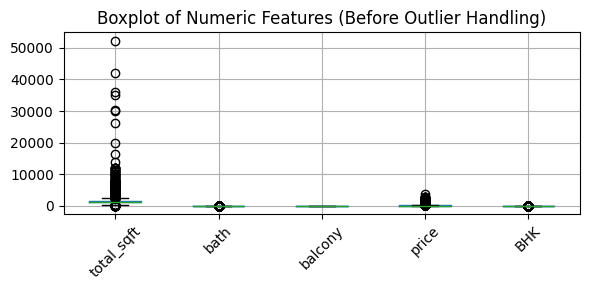

In [11]:
# Boxplot for all numeric columns BEFORE handling outliers
plt.figure(figsize=(6, 3))
df.select_dtypes(include=np.number).boxplot()
plt.title('Boxplot of Numeric Features (Before Outlier Handling)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
for c in df.select_dtypes(include=np.number):
    q1,q3 = df[c].quantile([0.25,0.75]); iqr = q3-q1
    lo,hi = q1-1.5*iqr, q3+1.5*iqr
    df[c] = df[c].clip(lo,hi)

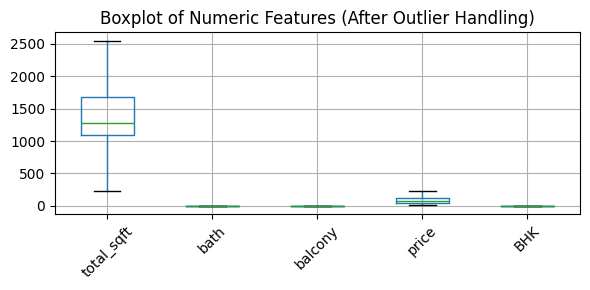

In [13]:
# Boxplot AFTER outlier handling
plt.figure(figsize=(6, 3))
df.select_dtypes(include=np.number).boxplot()
plt.title('Boxplot of Numeric Features (After Outlier Handling)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
